# OOI Endurance Array Surface Mooring Dissolved Oxygen Quality Assessments

Three resources are available to users looking to determine the quality of the OOI Endurance Array (EA) dissolved oxygen (DO) measurements: human in the loop (HITL) annotations, overlapping deployments and discrete samples from shipboard CTD systems collected during the deployment/recovery cruises. HITL annotations are [covered in another notebook](ooiea_dosta_annotations_hitl_qc.ipynb).

The OOI EA moorings are usually deployed such that the new mooring with recently refurbished and recalibrated sensors is deployed while the older mooring deployed for the past ~6 months is still in the water. The period of overlapping time before the older mooring is recovered varies; operational constraints dictate how long the overlap is, but we try for 24 to 48 hours. During this same time period we collect discrete water samples with the shipboard CTD. Sampling depths always include near bottom, 7 m and near surface in order to align with the locations of sensor packages on the moorings. Samples include chlorophyll, nutrients, dissolved oxygen, salinity and POC. All sample data is available online in a common spreadsheet format used by all of the OOI groups. Comparable discrete sampling is conducted for the OOI Cabled Array as well as the OOI Pioneer and Global arrays. Overlapping deployment data is also available for the OOI Pioneer and Global arrays

In [1]:
import datetime
import io
import os
import pandas as pd
import requests
import xarray as xr

from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')

### Washington Inshore Surface Mooring Summer 2020 Deployment -- Seafloor

The example code, shown below, uses DO data from the seafloor platform of the Washington Inshore Surface mooring (CE06ISSM) downloaded from OOI [earlier](./ooiea_uncabled_dosta_data.ipynb). Note, this just uses telemetered data. There is more data available for the older mooring (deployment 11) in the `recovered_inst` datasets, but the results shown do not change.

In [2]:
# Load the seafloor DO data from CE06ISSM previously saved
home = os.path.expanduser('~')
m2m_base = os.path.abspath(os.path.join(home, 'ooidata/m2m'))
data_path = os.path.join(m2m_base, 'ce06issm', 'seafloor', 'dosta')
ce06_11 = xr.load_dataset(os.path.join(data_path, 'ce06issm.seafloor.dosta.deploy11.recovered_inst.dosta_abcdjm_ctdbp_instrument_recovered.nc'))
ce06_12 = xr.load_dataset(os.path.join(data_path, 'ce06issm.seafloor.dosta.deploy12.telemetered.dosta_abcdjm_ctdbp_dcl_instrument.nc'))

### Overlapping Deployments

Due to operational constraints there was no overlapping time between mooring deployment and recovery, however the period where no mooring was in the water was brief. The older mooring (deployment 11) was recovered on 2020-07-14 at 17:34:00	UTC. The new mooring was deployed just 5 hours later at 22:53:00 UTC. Though there is a small time gap between the two moorings, the DO measurements should be comparable. Indeed, a plot of the data (shown below) collected during this time period indicates no real change in the time series of DO measurements. If the older sensor had significantly drifted or was heavily biofouled, we would expect a marked difference between the two deployments.

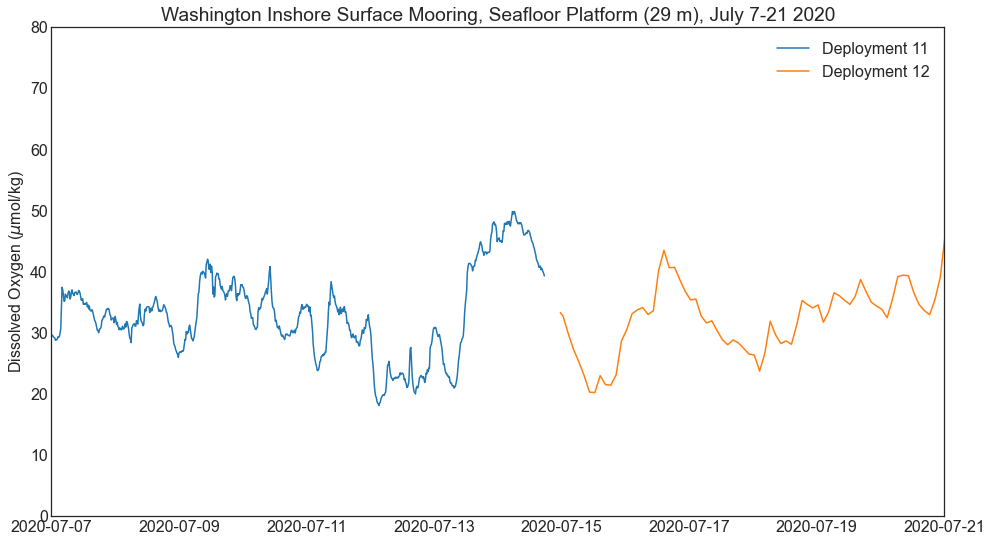

In [3]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})
plt.plot(ce06_11.time, ce06_11.oxygen_concentration_corrected[0, :], '-', label='Deployment 11')
plt.plot(ce06_12.time, ce06_12.oxygen_concentration_corrected[0, :], '-', label='Deployment 12')
plt.title('Washington Inshore Surface Mooring, Seafloor Platform (29 m), July 7-21 2020')
plt.ylabel(r'Dissolved Oxygen ($\mu$mol/kg)')
plt.xlim(datetime.date(2020, 7, 7), datetime.date(2020, 7, 21))
plt.ylim(0, 80)
plt.legend()

plt.show()

### Adding Discrete Sample Data

Data from the discrete samples is available from the OOI Document repository, Alfresco. There is a webdav interface and anonymous read-access is available using `guest` as the user name and password. The root directory is:

* [https://alfresco.oceanobservatories.org/alfresco/webdav/OOI/](https://alfresco.oceanobservatories.org/alfresco/webdav/OOI/)

For the EA, all the discrete sampling data is organized under the `Coastal Endurance Array` folder. Data is further organized according the to cruise name (combination of `Endurance-##_CruiseID_YYYY-MM` where `##` is the cruise number, `CruiseID` used by the research vessel, and `YYYY-MM` are the year and month for the start of the cruise), and then the `Ship_Data\Water Sampling` folder. The data for this particular example was collected during the Endurance 13 cruise on the R/V Thompson (TN380) beginning in July 2020. The data is available in CSV format. Additionally, a more extensive write-up describing the common spreadsheet format and contents will be made available before the end of the year. Putting all the information together from above, and using the `read_csv` function from pandas, we can now load the discrete sample data.

In [4]:
# Setup the URL, request the data applying basic authentication and then load the excel spreadsheet
discrete_URL = ('https://alfresco.oceanobservatories.org/alfresco/webdav/OOI/'
                'Coastal%20Endurance%20Array/Cruise%20Data/Endurance-13_TN380_2020-07/'
                'Ship_Data/Water%20Sampling/Endurance-13_TN380_Discrete_Summary.csv')
r = requests.get(discrete_URL, auth=('guest', 'guest'))
times = ['Start Time [UTC]', 'CTD Bottle Closure Time [UTC]']
discrete = pd.read_csv(io.StringIO(r.content.decode('utf-8')), parse_dates=times)
discrete[96:]

,Cruise,Station,Target Asset,Start Latitude [degrees],Start Longitude [degrees],Start Time [UTC],Cast,Cast Flag,Bottom Depth at Start Position [m],CTD File,...,Discrete pH Duplicate Flag,Calculated Alkalinity [umol/kg],Calculated DIC [umol/kg],Calculated pCO2 [uatm],Calculated pH,Calculated CO2aq [umol/kg],Calculated bicarb [umol/kg],Calculated CO3 [umol/kg],Calculated Omega-C,Calculated Omega-A
96,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
97,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
98,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
99,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
100,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
101,TN380,CE06,CE06ISSM,47.13483,-124.27233,2020-07-14 17:00:47+00:00,14,100,31,TN380-014,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
102,TN380,CE06,CE06ISSM,47.13583,-124.27150,2020-07-14 23:08:29+00:00,15,100,31,TN380-015,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
103,TN380,CE06,CE06ISSM,47.13583,-124.27150,2020-07-14 23:08:29+00:00,15,100,31,TN380-015,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
104,TN380,CE06,CE06ISSM,47.13583,-124.27150,2020-07-14 23:08:29+00:00,15,100,31,TN380-015,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999
105,TN380,CE06,CE06ISSM,47.13583,-124.27150,2020-07-14 23:08:29+00:00,15,100,31,TN380-015,...,0,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999,-9999999


In [5]:
discrete.columns

Index(['Cruise', 'Station', 'Target Asset', 'Start Latitude [degrees]',
       'Start Longitude [degrees]', 'Start Time [UTC]', 'Cast', 'Cast Flag',
       'Bottom Depth at Start Position [m]', 'CTD File', 'CTD File Flag',
       'Niskin/Bottle Position', 'Niskin Flag',
       'CTD Bottle Closure Time [UTC]', 'CTD Pressure [db]',
       'CTD Pressure Flag', 'CTD Depth [m]', 'CTD Latitude [deg]',
       'CTD Longitude [deg]', 'CTD Temperature 1 [deg C]',
       'CTD Temperature 1 Flag', 'CTD Temperature 2 [deg C]',
       'CTD Temperature 2 Flag', 'CTD Conductivity 1 [S/m]',
       'CTD Conductivity 1 Flag', 'CTD Conductivity 2 [S/m]',
       'CTD Conductivity 2 Flag', 'CTD Salinity 1 [psu]',
       'CTD Salinity 2 [psu]', 'CTD Oxygen [mL/L]', 'CTD Oxygen Flag',
       'CTD Oxygen Saturation [mL/L]', 'CTD Fluorescence [mg/m^3]',
       'CTD Fluorescence Flag', 'CTD Beam Attenuation [1/m]',
       'CTD Beam Transmission [%]', 'CTD Transmissometer Flag', 'CTD pH',
       'CTD pH Flag', 'D

The discrete dissolved oxygen concentration samples are reported in mL/L, while the dissolved oxygen data provided by OOI are in µmol/L and µmol/kg. The latter measurement has been corrected for the effects of salinity and pressure. In order to compare the discrete sample data to instrument data, we need to convert the units. This is fairly straightforward to do, using the Gibbs-SeaWater (GSW) Oceanographic Toolbox for python.

In [6]:
# Convert the discrete oxygen samples from ml/L to umol/kg
import gsw
psu = discrete['CTD Salinity 1 [psu]']
dbar = discrete['CTD Pressure [db]']
degC = discrete['CTD Temperature 1 [deg C]']
lon = discrete['Start Longitude [degrees]']
lat = discrete['Start Latitude [degrees]']
SA = gsw.SA_from_SP(psu, dbar, lon, lat)  # absolute salinity
pt = gsw.pt0_from_t(SA, degC, dbar)       # potential temperature at 0 dbar
rho = gsw.rho(SA, pt, 0) / 1000           # potential density at 0 dbar
discrete['Discrete Oxygen [umol/kg]'] = discrete['Discrete Oxygen [mL/L]'] * 44.6596 / rho

I cheated and already went through the spreadsheet, so I know the samples we are after are in indexes 96:97 and 102:103. Those samples were collected at 17:00 and 23:08 UTC, overlapping the older mooring right before recovery and the newer mooring right after deployment. We should be able to add those samples to the earlier plot. There are other methods one could employ to search through the discrete samples to find ones that correspond to the instrument of interest. In general, I use a procedure that looks for samples collected within 2 km of a mooring and within +/- 3 m of the depth of the instrument of interest. 

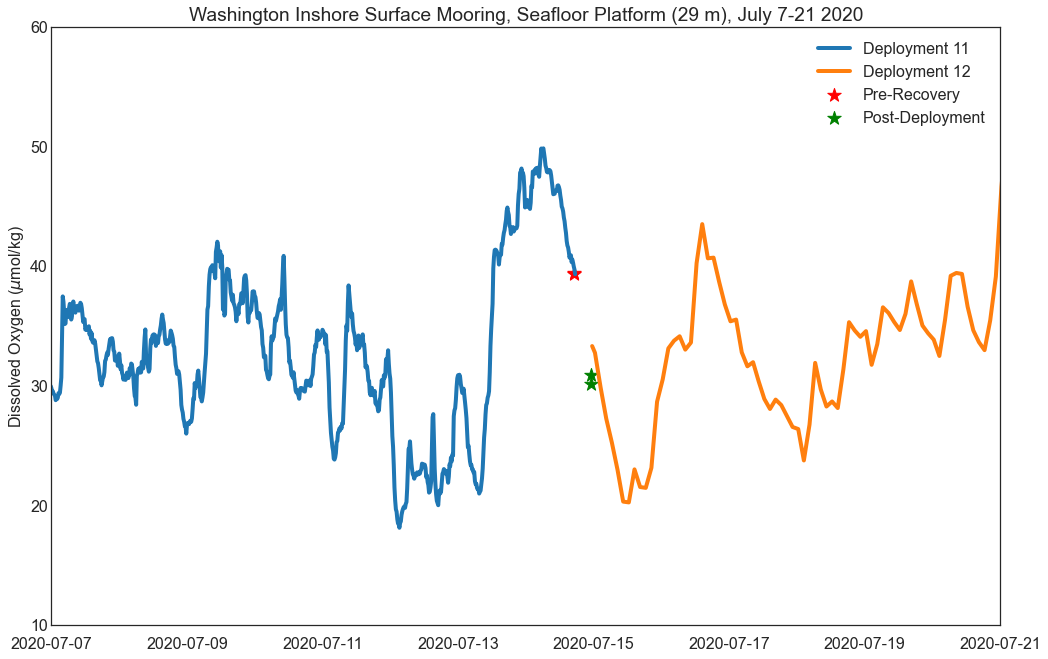

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the data adding the discrete sample data
fig = plt.figure(figsize=(17,11))
plt.rcParams.update({'font.size': 16, 'xtick.major.pad': 12})
plt.plot(ce06_11.time, ce06_11.oxygen_concentration_corrected[0, :], '-', label='Deployment 11', linewidth=4)
plt.scatter(discrete['Start Time [UTC]'][96:98], discrete['Discrete Oxygen [umol/kg]'][96:98], s=200, marker='*', label='Pre-Recovery', c='r')
plt.plot(ce06_12.time, ce06_12.oxygen_concentration_corrected[0, :], '-', label='Deployment 12', linewidth=4)
plt.scatter(discrete['Start Time [UTC]'][102:104], discrete['Discrete Oxygen [umol/kg]'][102:104], s=200, marker='*', label='Post-Deployment', c='g')
plt.title('Washington Inshore Surface Mooring, Seafloor Platform (29 m), July 7-21 2020')
plt.ylabel(r'Dissolved Oxygen ($\mu$mol/kg)')
plt.xlim(datetime.date(2020, 7, 7), datetime.date(2020, 7, 21))
plt.ylim(10, 60)
plt.legend()
plt.show()
plt.draw()
fig.savefig('CE06ISSM_Summer_2020_Seafloor_DO_Comparison.pdf', dpi=300)

### Washington Shelf Surface Mooring Summer 2020 Deployment -- Midwater NSIF, 7 m

The data from the Washington Shelf surface mooring, collected this past summer, provides an example of overlapping deployment data with discrete samples. One thing to bear in mind is the spatial separation between the CTD cast and the moorings, as well as between the overlapping moorings themselves. We observe a significant degree of spatio-temporal variability at the Endurance sites, and this can be seen in the data when cross-comparing the overlapping deployments and the discrete samples. Though there will often be very close agreement between the overlapping data and the discrete sample data, the agreement will rarely be 1:1.

In [8]:
# Load the seafloor DO data from CE07SHSM previously saved
home = os.path.expanduser('~')
m2m_base = os.path.abspath(os.path.join(home, 'ooidata/m2m'))
data_path = os.path.join(m2m_base, 'ce07shsm', 'nsif', 'dosta')
ce07 = xr.load_dataset(os.path.join(data_path, 'ce07shsm.nsif.dosta.Summer2020.nc'))
m10 = ce07.where(ce07.deployment==10)
m11 = ce07.where(ce07.deployment==11)

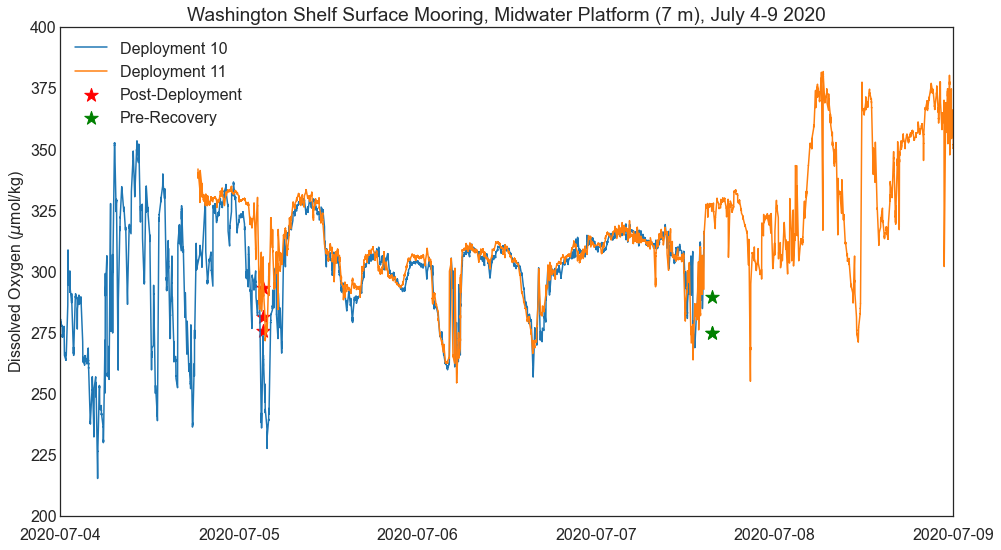

In [9]:
# Plot the overlap and the discrete sample data
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16, 'xtick.major.pad': 12, 'xtick.direction': 'out'})
plt.plot(m10.time, m10.oxygen_concentration_corrected[0, :], '-', label='Deployment 10')
plt.scatter(discrete['Start Time [UTC]'][10:13], discrete['Discrete Oxygen [umol/kg]'][10:13], s=200, c='r', marker='*', label='Post-Deployment')
plt.plot(m11.time, m11.oxygen_concentration_corrected[0, :], '-', label='Deployment 11')
plt.scatter(discrete['Start Time [UTC]'][32:35], discrete['Discrete Oxygen [umol/kg]'][32:35], s=200, c='g', marker='*', label='Pre-Recovery')
plt.title('Washington Shelf Surface Mooring, Midwater Platform (7 m), July 4-9 2020')
plt.ylabel(r'Dissolved Oxygen ($\mu$mol/kg)')
plt.xlim(datetime.date(2020, 7, 4), datetime.date(2020, 7, 9))
plt.ylim(200, 400)
plt.legend()
plt.show()